## **Objectif**
Créer un modèle de prédiction de prix des ordinateurs portables.

### **Description du jeu de données**
Le présent jeu de données contient 1303 lignes d'enregistrements de ventes des ordinateurs portables et comporte 11 colonnes à savoir : 
1. Company : Le nom de la compagnie qui a fabriqué la machine (ordinateur)
2. TypeName : Le type d'ordinateur (ex: Notebook, Gaming, ...)
3. Inches : La taille de l'ordinateur portable en pouces
4. ScreenResolution : La résolution d'écran
5. Cpu : L'unité centrale de traitement (processeur)
6. Ram : la mémoire vive de l'ordinateur portable
7. Memory : Capacité de stockage des données (disque dur/mémoire ssd)
8. Gpu : L'unité de traitement graphique
9. OpSys : Le système d'exploitation installé dans l'ordinateur portable (Windows, Linux, MacOs, ...)
10. Weight : Le poids de l'ordinateur en kg
11. Price : Le prix de vente de l'ordinateur portable (en Roupies Indiennes (INR))

## Importation des bibliothèques de l'analyse exploratoire

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Analyse Exploratoire

In [133]:
df_price = pd.read_csv("laptop_data.csv")
df_price

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [134]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [135]:
df_price.columns

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [136]:
# Suppression de la colonne Unamed
df_price.drop("Unnamed: 0", axis=1, inplace=True)

In [137]:
df_price

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


Conversion du prix (Roupie Indienne) en dollar canadien. A date, 1 INR = 0.017

In [138]:
df_price['Price'] = np.round(df_price['Price'] * 0.017, 2)

In [139]:
df_price

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1213.44
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,814.22
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,520.81
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2298.32
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1633.63
...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,577.87
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1357.73
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,207.42
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,692.00


In [140]:
df_price.describe()

,Inches,Price
count,1303.000000,1303.000000
mean,15.017191,1017.790660
std,1.426304,633.134403
min,10.100000,157.600000
25%,14.000000,542.550000
50%,15.600000,884.930000
75%,15.600000,1347.665000
max,18.400000,5524.230000


In [141]:
# Voir s'il y a des valeurs manquantes
df_price.isna().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

Vérification des valeurs dupliquées

In [142]:
df_price.duplicated().sum()

29

Suppression des unités GB et kg pour les colonnes Ram et Weight

In [143]:
df_price["Ram"] = df_price["Ram"].str.replace("GB", "")
df_price["Weight"] = df_price["Weight"].str.replace("kg", "")

# Conversion du type en entier pour la Ram et en float pour la colonne poids (Weight)
df_price["Ram"] = df_price["Ram"].astype("int64")
df_price["Weight"] = df_price["Weight"].astype("float64")

In [144]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int64  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 112.1+ KB


Diagramme de distribution du prix

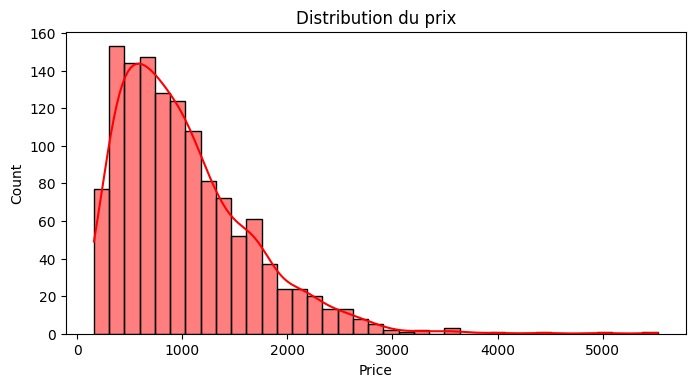

In [145]:
plt.figure(figsize=(8, 4), dpi=100)
plt.title("Distribution du prix")
sns.histplot(df_price["Price"], kde=True, thresh=None, color="red");

*La distribution du prix est asymétrique à droite.*

In [146]:
df_price

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1213.44
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,814.22
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,520.81
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2298.32
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1633.63
...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,577.87
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,1357.73
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,207.42
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,692.00


**Visualisation**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


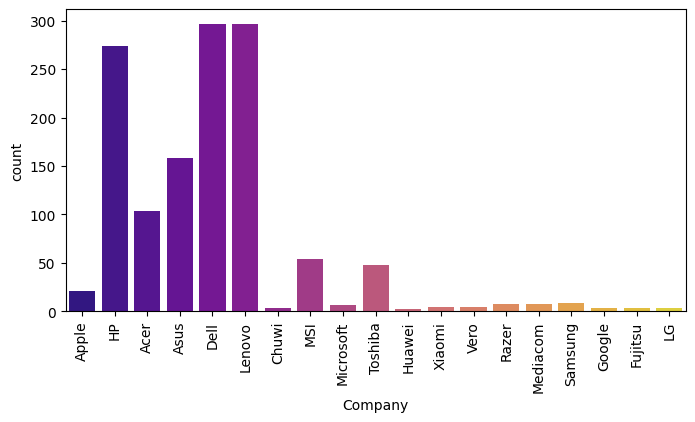

In [147]:
# Pour la colonne Company
plt.figure(figsize=(8, 4), dpi=100)
plt.xticks(rotation="vertical")
sns.countplot(df_price["Company"], palette="plasma");

*Nous voyons que les compagnies les plus représentées dans le jeu de données sont : HP, Dell, Lenovo. Ensuite, vient Asus, Acer, MSI, Toshiba et Apple.*

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


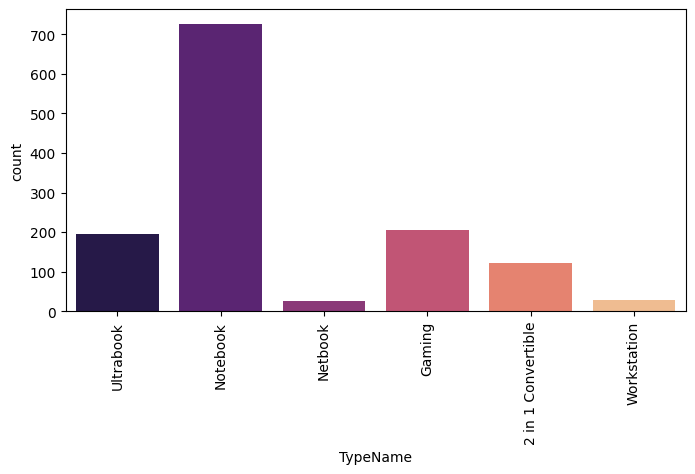

In [148]:
# Pour la colonne TypeName
plt.figure(figsize=(8, 4), dpi=100)
plt.xticks(rotation="vertical")
sns.countplot(df_price["TypeName"], palette="magma");

*Les Types d'ordinateurs les plus représentés sont les : Notebook, Ultrabook, Gaming.*

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


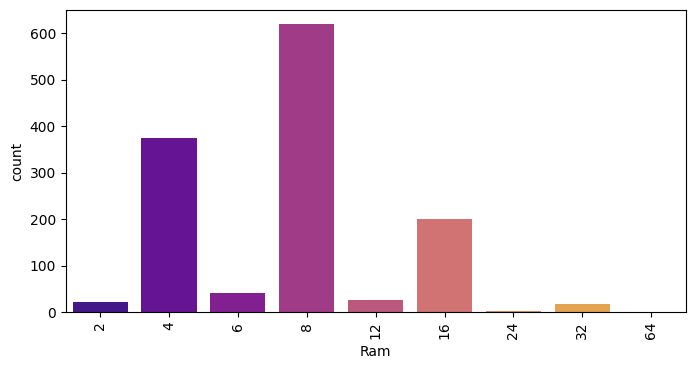

In [149]:
# Pour la colonne Ram
plt.figure(figsize=(8, 4), dpi=100)
plt.xticks(rotation="vertical")
sns.countplot(df_price["Ram"], palette="plasma");

*Sur ce graphique ci-dessus, nous voyons que les pc les plus utilisés ont une Ram de : 8, 4 et 16 gb.*

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


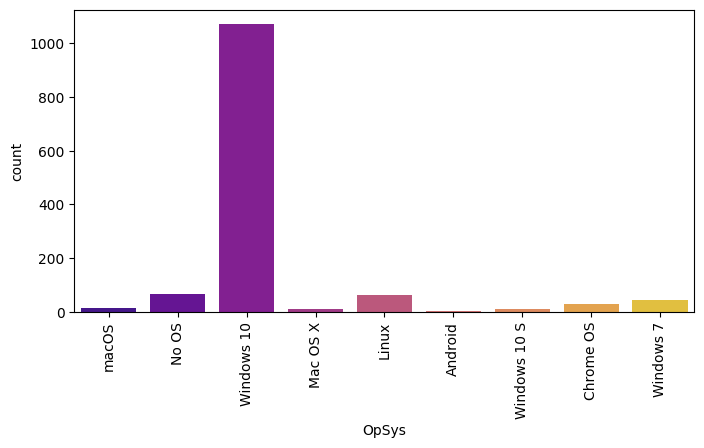

In [150]:
# Pour la colonne OpSys
plt.figure(figsize=(8, 4), dpi=100)
plt.xticks(rotation="vertical")
sns.countplot(df_price["OpSys"], palette="plasma");

*Le système d'exploitation le plus utilisé est windows 10 pour ce dataset, ensuite, vient Linux.*

In [151]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int64  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 112.1+ KB


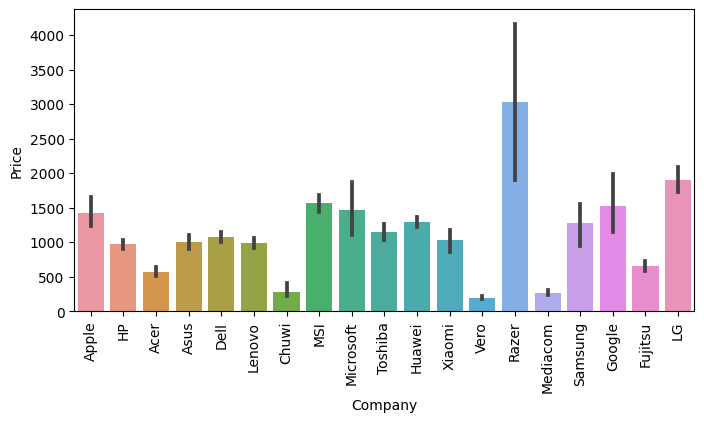

In [152]:
# Variation du prix moyen des pc selon les compagnies
# Permet de connaître le prix de moyen des pc en vente de chaque compagnie
plt.figure(figsize=(8, 4), dpi=100)
plt.xticks(rotation="vertical")
sns.barplot(x=df_price["Company"], y=df_price["Price"]);

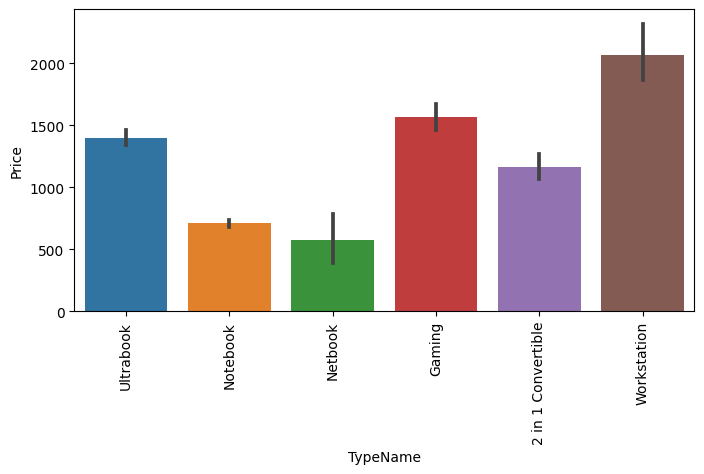

In [153]:
# Variation du prix moyen des pc selon les types de modèle
# Permet de connaître le prix de moyen des pc en vente selon chaque modèle
plt.figure(figsize=(8, 4), dpi=100)
plt.xticks(rotation="vertical")
sns.barplot(x=df_price["TypeName"], y=df_price["Price"]);

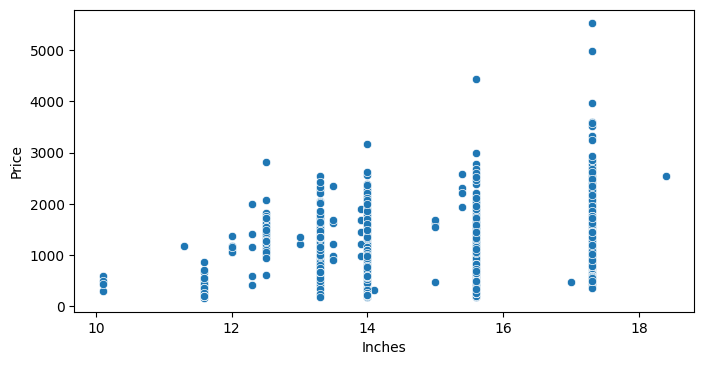

In [154]:
# Variation des pouces avec le prix
plt.figure(figsize=(8, 4), dpi=100)
sns.scatterplot(x=df_price["Inches"], y=df_price["Price"]);

*Avec ce graphique, il n'y a pas de relation entre les pouces et le prix. 
Je ne peux donc pas dire que la variation des pouces peut influencer sur le prix.*

**Note : Je vais revenir sur cette feature pour faire du feature engenieering et générer de nouvelles colonnes significatives pour le prix.**

**Feature Engenieering sur la colonne ScreenResolution**

In [155]:
df_price["ScreenResolution"].unique()

array(['IPS Panel Retina Display 2560x1600', '1440x900',
       'Full HD 1920x1080', 'IPS Panel Retina Display 2880x1800',
       '1366x768', 'IPS Panel Full HD 1920x1080',
       'IPS Panel Retina Display 2304x1440',
       'IPS Panel Full HD / Touchscreen 1920x1080',
       'Full HD / Touchscreen 1920x1080',
       'Touchscreen / Quad HD+ 3200x1800',
       'IPS Panel Touchscreen 1920x1200', 'Touchscreen 2256x1504',
       'Quad HD+ / Touchscreen 3200x1800', 'IPS Panel 1366x768',
       'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
       'IPS Panel Full HD 2160x1440',
       '4K Ultra HD / Touchscreen 3840x2160', 'Touchscreen 2560x1440',
       '1600x900', 'IPS Panel 4K Ultra HD 3840x2160',
       '4K Ultra HD 3840x2160', 'Touchscreen 1366x768',
       'IPS Panel Full HD 1366x768', 'IPS Panel 2560x1440',
       'IPS Panel Full HD 2560x1440',
       'IPS Panel Retina Display 2736x1824', 'Touchscreen 2400x1600',
       '2560x1440', 'IPS Panel Quad HD+ 2560x1440',
       'IPS Panel 

In [156]:
df_price["ScreenResolution"].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

*Je vais générer 2 nouvelles colonnes à partir (Touchscreen et IPS) à partir de la colonne ScreenResolution afin de pouvoir catégoriser les types de résolution d'écran.*

In [157]:
df_price["ScreenResolution"]

0               IPS Panel Retina Display 2560x1600
1                                         1440x900
2                                Full HD 1920x1080
3               IPS Panel Retina Display 2880x1800
4               IPS Panel Retina Display 2560x1600
                           ...                    
1298     IPS Panel Full HD / Touchscreen 1920x1080
1299    IPS Panel Quad HD+ / Touchscreen 3200x1800
1300                                      1366x768
1301                                      1366x768
1302                                      1366x768
Name: ScreenResolution, Length: 1303, dtype: object

In [158]:
# Pour la colonne Touchscreen, si la le mot "Touchscreen" est présent je met 1 sinon 0.
df_price["Touchscreen"] = df_price["ScreenResolution"].apply(lambda element:1 if "Touchscreen" in element else 0)

In [159]:
df_price.sample(10)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
980,Dell,2 in 1 Convertible,15.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,12,512GB SSD,Intel HD Graphics 620,Windows 10,2.19,1176.58,1
491,Toshiba,Ultrabook,13.3,Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,32,512GB SSD,Intel HD Graphics 620,Windows 10,1.05,2535.22,1
1172,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4,500GB HDD,Intel HD Graphics,Windows 10,2.20,334.23,0
5,Acer,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4,500GB HDD,AMD Radeon R5,Windows 10,2.10,362.30,0
182,Lenovo,2 in 1 Convertible,13.9,IPS Panel 4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 8550U 1.8GHz,16,512GB SSD,Intel UHD Graphics 620,Windows 10,1.40,1674.75,1
1227,Dell,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,4,1TB HDD,Intel HD Graphics 520,Linux,2.18,472.68,0
1033,HP,Notebook,14.0,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows 7,1.95,1082.38,0
866,Toshiba,Ultrabook,13.3,1366x768,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.20,991.81,0
22,HP,Notebook,15.6,1366x768,AMD E-Series E2-9000e 1.5GHz,4,500GB HDD,AMD Radeon R2,No OS,1.86,233.69,0
753,Lenovo,Ultrabook,14.0,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4,180GB SSD,Intel HD Graphics 520,Windows 10,1.70,992.71,0


**Visualisation de la colonne Touchscreen**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


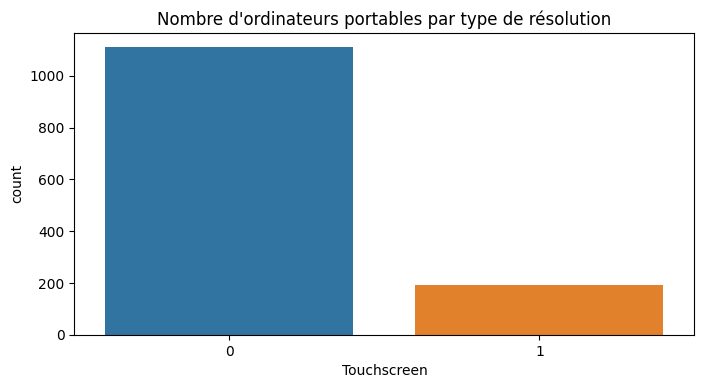

In [160]:
plt.figure(figsize=(8, 4), dpi=100)
plt.title("Nombre d'ordinateurs portables par type de résolution")
sns.countplot(df_price["Touchscreen"]);

*La plupart des ordinateurs portables dans ce jeu de données ont une résolution non tactile. Il y a juste environ 200 pc ayant une résolution tactile.*

In [161]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int64  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
dtypes: float64(3), int64(2), object(7)
memory usage: 122.3+ KB


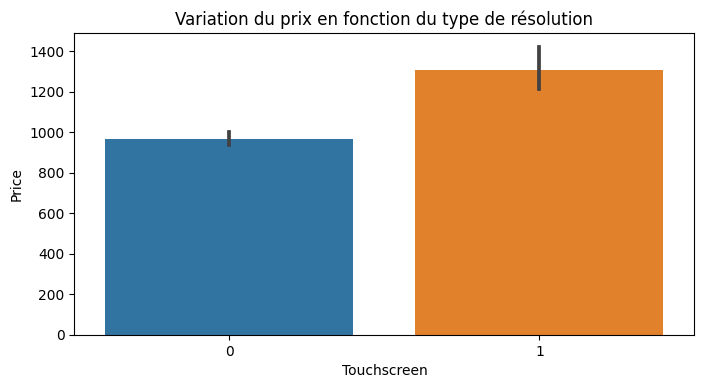

In [162]:
# La variation avec le prix
plt.figure(figsize=(8, 4), dpi=100)
plt.title("Variation du prix en fonction du type de résolution")
sns.barplot(x=df_price["Touchscreen"], y=df_price["Price"]);

In [163]:
# Pour la colonne IPS, si la le mot "IPS" est présent je met 1 sinon 0.
df_price["IPS"] = df_price["ScreenResolution"].apply(lambda element:1 if "IPS" in element else 0)

In [164]:
df_price.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS
1031,Acer,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,6,1TB HDD,AMD Radeon R5,Windows 10,2.10,370.46,0,0
914,Acer,Notebook,15.6,Full HD 1920x1080,Intel Core i3 7100U 2.4GHz,4,1TB HDD,Intel HD Graphics 620,Windows 10,2.40,451.97,0,0
250,Dell,2 in 1 Convertible,15.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 8550U 1.8GHz,8,1TB HDD,Intel UHD Graphics 620,Windows 10,2.08,741.82,1,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,814.22,0,0
746,Samsung,Ultrabook,13.3,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,16,256GB SSD,Intel HD Graphics 620,Windows 10,0.81,1493.60,0,0


**Visualisation de la colonne IPS**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


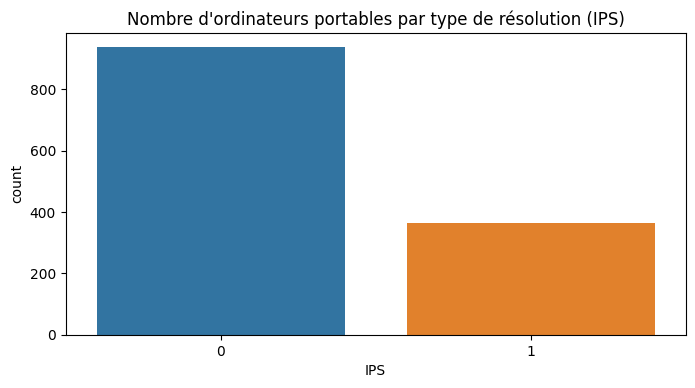

In [165]:
plt.figure(figsize=(8, 4), dpi=100)
plt.title("Nombre d'ordinateurs portables par type de résolution (IPS)")
sns.countplot(df_price["IPS"]);

*Les pc dont la résolution est de type IPS (environ 400) sont plus représentés dans le jeu de données par rapport à ceux tactiles (environ 200).*

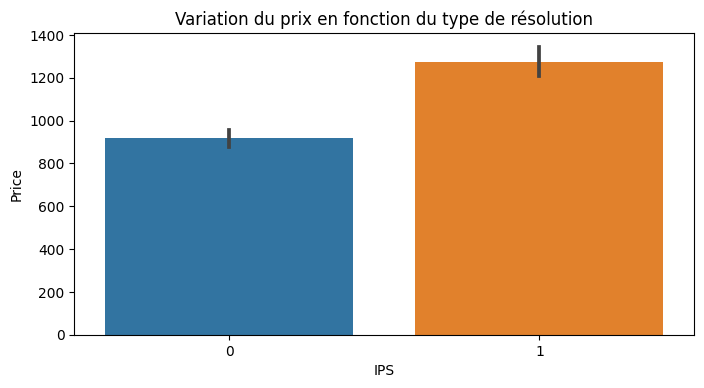

In [166]:
# La variation avec le prix
plt.figure(figsize=(8, 4), dpi=100)
plt.title("Variation du prix en fonction du type de résolution")
sns.barplot(x=df_price["IPS"], y=df_price["Price"]);

*Maintenant, je vais récupérer la résolution horizontale (X Resolution) et celle verticale (Y Resolution) à partir de la colonne ScreenResolution.*

In [167]:
# Diviser les valeurs de la colonne ScreenResolution en 2 morceaux à partir de (x)
splitDf = df_price["ScreenResolution"].str.split("x", n=1, expand=True)

df_price["X_res"] = splitDf[0]
df_price["Y_res"] = splitDf[1]
df_price.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1213.44,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,814.22,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,520.81,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2298.32,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1633.63,0,1,IPS Panel Retina Display 2560,1600


In [168]:
# Comme X_res contient des chaînes caractères, je vais extraire uniquement les nombres en utilisant une expression régulière
df_price["X_res"] = df_price["X_res"].str.findall(r'(\d+\.?\d+)').apply(lambda x: x[0])
df_price.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1213.44,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,814.22,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,520.81,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2298.32,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1633.63,0,1,2560,1600


In [169]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int64  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  X_res             1303 non-null   object 
 14  Y_res             1303 non-null   object 
dtypes: float64(3), int64(3), object(9)
memory usage: 152.8+ KB


In [170]:
# Je vais convertir les nouvelles colonnes (X_res et Y_res) en entier
df_price["X_res"] = df_price["X_res"].astype("int64")
df_price["Y_res"] = df_price["Y_res"].astype("int64")

In [171]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int64  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  X_res             1303 non-null   int64  
 14  Y_res             1303 non-null   int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 152.8+ KB


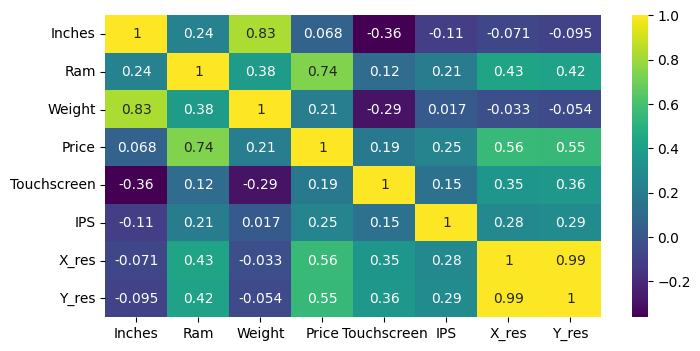

In [172]:
plt.figure(figsize=(8, 4), dpi=100)
sns.heatmap(data=df_price.corr(), annot=True, cmap="viridis");

*Si nous regardons cette figure de très près, nous voyons que les 2 dernières colonnes générées (X_res et Y_res) sont corrélées aux prix, mais l'attention est portée beaucoup plus sur la corrélation qui existe entre elles (colinéarité entre les prédicteurs).*

*Pour éviter la colinéarité entre les prédicteurs (dans mon cas, entre X_res et Y_res), je vais les combiner à la colonne Inches qui a une colinérarité faible dans une nouvelle colonne appelée PPI (pouces par pixels en anglais pixel per inch).*

Voici la formule : $$
    PPI(pixels per inch) = \frac{\sqrt{X_resolution^2+Y_resolution^2}}{inches}
$$

In [173]:
df_price["PPI"] = np.sqrt((df_price["X_res"]**2) + (df_price["Y_res"]**2)/df_price["Inches"])
df_price.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res,PPI
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1213.44,0,1,2560,1600,2597.321929
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,814.22,0,0,1440,900,1460.993585
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,520.81,0,0,1920,1080,1939.373412
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2298.32,0,1,2880,1800,2916.297243
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1633.63,0,1,2560,1600,2597.321929


In [174]:
df_price.corr()["Price"]

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
IPS            0.252208
X_res          0.556529
Y_res          0.552809
PPI            0.555964
Name: Price, dtype: float64

*Comme la combinaison des 3 colonnes m'a donné une colonne qui est plutôt corrélée au prix, je vais supprimer les 3 colonnes (Inches, X_res et Y_res).*

In [175]:
df_price.drop(["Inches", "X_res", "Y_res"], axis=1, inplace=True)

In [176]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   ScreenResolution  1303 non-null   object 
 3   Cpu               1303 non-null   object 
 4   Ram               1303 non-null   int64  
 5   Memory            1303 non-null   object 
 6   Gpu               1303 non-null   object 
 7   OpSys             1303 non-null   object 
 8   Weight            1303 non-null   float64
 9   Price             1303 non-null   float64
 10  Touchscreen       1303 non-null   int64  
 11  IPS               1303 non-null   int64  
 12  PPI               1303 non-null   float64
dtypes: float64(3), int64(3), object(7)
memory usage: 132.5+ KB


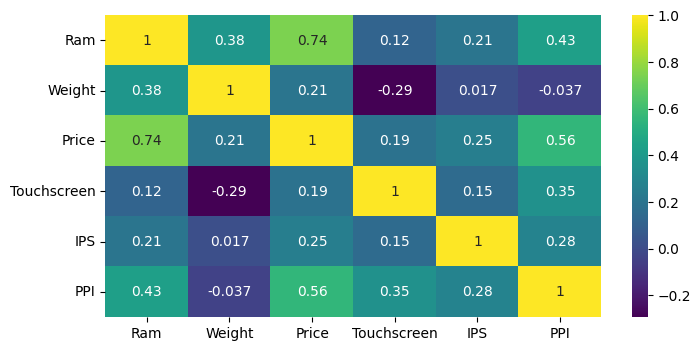

In [177]:
plt.figure(figsize=(8, 4), dpi=100)
sns.heatmap(data=df_price.corr(), annot=True, cmap="viridis");

In [178]:
df_price

,Company,TypeName,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI
0,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1213.44,0,1,2597.321929
1,Apple,Ultrabook,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,814.22,0,0,1460.993585
2,HP,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,520.81,0,0,1939.373412
3,Apple,Ultrabook,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2298.32,0,1,2916.297243
4,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1633.63,0,1,2597.321929
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,577.87,1,1,1941.575207
1299,Lenovo,2 in 1 Convertible,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,1357.73,1,1,3237.840179
1300,Lenovo,Notebook,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,207.42,0,0,1381.334965
1301,HP,Notebook,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,692.00,0,0,1379.769992


In [179]:
# Je vais supprimer également la colonne ScreenResolution parce que ces informations ont
# été partagé dans d'autres colonnes
df_price.drop("ScreenResolution", axis=1, inplace=True)

In [180]:
df_price

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1213.44,0,1,2597.321929
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,814.22,0,0,1460.993585
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,520.81,0,0,1939.373412
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2298.32,0,1,2916.297243
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1633.63,0,1,2597.321929
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,577.87,1,1,1941.575207
1299,Lenovo,2 in 1 Convertible,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,1357.73,1,1,3237.840179
1300,Lenovo,Notebook,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,207.42,0,0,1381.334965
1301,HP,Notebook,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,692.00,0,0,1379.769992


**Feature Engineering sur la colonne Cpu**

In [181]:
df_price["Cpu"].value_counts()[:60]

Intel Core i5 7200U 2.5GHz              190
Intel Core i7 7700HQ 2.8GHz             146
Intel Core i7 7500U 2.7GHz              134
Intel Core i7 8550U 1.8GHz               73
Intel Core i5 8250U 1.6GHz               72
Intel Core i5 6200U 2.3GHz               68
Intel Core i3 6006U 2GHz                 64
Intel Core i7 6500U 2.5GHz               49
Intel Core i7 6700HQ 2.6GHz              43
Intel Core i3 7100U 2.4GHz               37
Intel Core i5 7300HQ 2.5GHz              33
Intel Celeron Dual Core N3350 1.1GHz     30
Intel Celeron Dual Core N3060 1.6GHz     28
Intel Core i7 6600U 2.6GHz               18
Intel Core i3 6006U 2.0GHz               16
Intel Pentium Quad Core N4200 1.1GHz     14
Intel Core i5 7300U 2.6GHz               14
Intel Core i7 7600U 2.8GHz               13
Intel Pentium Quad Core N3710 1.6GHz     11
AMD A9-Series 9420 3GHz                  11
Intel Core i5 6300U 2.4GHz               11
Intel Celeron Dual Core N3050 1.6GHz     11
Intel Core i7 6820HK 2.7GHz     

In [182]:
df_price["Cpu"].unique()

array(['Intel Core i5 2.3GHz', 'Intel Core i5 1.8GHz',
       'Intel Core i5 7200U 2.5GHz', 'Intel Core i7 2.7GHz',
       'Intel Core i5 3.1GHz', 'AMD A9-Series 9420 3GHz',
       'Intel Core i7 2.2GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i3 6006U 2GHz',
       'Intel Core i7 2.8GHz', 'Intel Core M m3 1.2GHz',
       'Intel Core i7 7500U 2.7GHz', 'Intel Core i7 2.9GHz',
       'Intel Core i3 7100U 2.4GHz', 'Intel Atom x5-Z8350 1.44GHz',
       'Intel Core i5 7300HQ 2.5GHz', 'AMD E-Series E2-9000e 1.5GHz',
       'Intel Core i5 1.6GHz', 'Intel Core i7 8650U 1.9GHz',
       'Intel Atom x5-Z8300 1.44GHz', 'AMD E-Series E2-6110 1.5GHz',
       'AMD A6-Series 9220 2.5GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Core i3 7130U 2.7GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i5 2.0GHz', 'AMD Ryzen 1700 3GHz',
       'Intel Pentium Quad Core N4200 1.1GHz',
       'Intel Atom x5-Z8550 1.44GHz',
       'Intel Celeron Du

*Nous voyons que les processeurs intel sont les plus dominants dans ce jeu de données.*

*Dans un premier temps, je vais récupérer les processeurs intel les plus populaires (i7, i5, i3) et classer le reste dans AMD et autres processeurs intel.*

In [183]:
# Récupération des 3 premiers indices de chaque ligne de la colonne Cpu
text = df_price["Cpu"].apply(lambda x: " ".join(x.split()[:3]))

# Création d'une fonction pour catégoriser les processeurs
def get_processor(value):
  if value == "Intel Core i7" or value == "Intel Core i5" or value == "Intel core i3":
    return value
  else:
    if value.split()[0] != "Intel":
      return "AMD Processor"
    else:
      return "Other Intel Processor"

# Création d'une nouvelle colonne Cpu_name pour stocker la catégorie des processeurs
df_price["Cpu_name"] = text.apply(lambda x: get_processor(x))
df_price

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu_name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1213.44,0,1,2597.321929,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,814.22,0,0,1460.993585,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,520.81,0,0,1939.373412,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2298.32,0,1,2916.297243,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1633.63,0,1,2597.321929,Intel Core i5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,577.87,1,1,1941.575207,Intel Core i7
1299,Lenovo,2 in 1 Convertible,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,1357.73,1,1,3237.840179,Intel Core i7
1300,Lenovo,Notebook,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,207.42,0,0,1381.334965,Other Intel Processor
1301,HP,Notebook,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,692.00,0,0,1379.769992,Intel Core i7


In [184]:
# Comme j'ai récupéré le nom des processeurs à partir de la colonne Cpu, je vais la supprimer
df_price.drop("Cpu", axis=1, inplace=True)

In [185]:
df_price

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu_name
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1213.44,0,1,2597.321929,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,814.22,0,0,1460.993585,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,520.81,0,0,1939.373412,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2298.32,0,1,2916.297243,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1633.63,0,1,2597.321929,Intel Core i5
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,577.87,1,1,1941.575207,Intel Core i7
1299,Lenovo,2 in 1 Convertible,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,1357.73,1,1,3237.840179,Intel Core i7
1300,Lenovo,Notebook,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,207.42,0,0,1381.334965,Other Intel Processor
1301,HP,Notebook,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,692.00,0,0,1379.769992,Intel Core i7


**Visualisation de la colonne Cpu_name**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


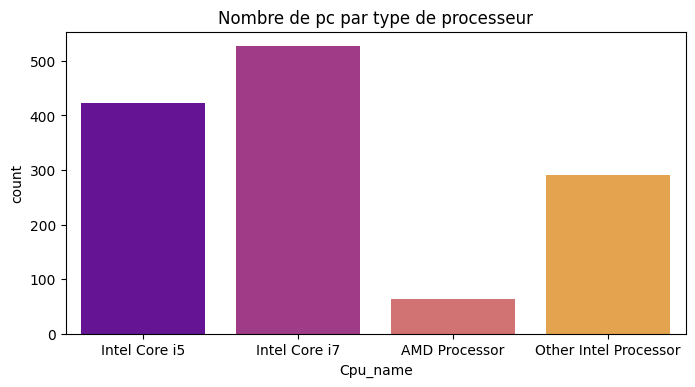

In [186]:
plt.figure(figsize=(8, 4), dpi=100)
plt.title("Nombre de pc par type de processeur")
sns.countplot(df_price["Cpu_name"], palette="plasma");

*Nous pouvons voir sur la figure ci-dessus que les pc ayant les processeurs intels sont les plus représentés.*

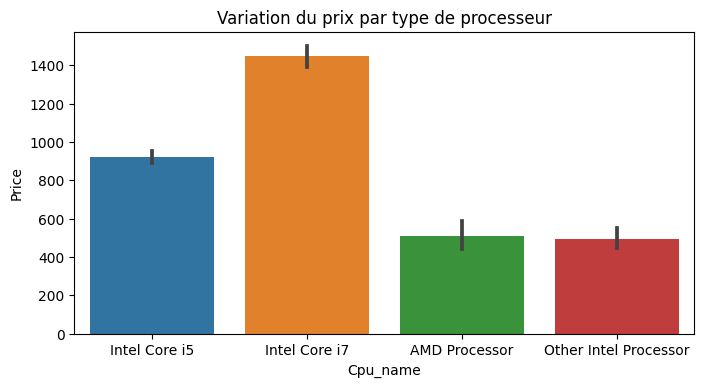

In [187]:
# Variation du prix avec le processeur
plt.figure(figsize=(8, 4), dpi=100)
plt.title("Variation du prix par type de processeur")
sns.barplot(x=df_price["Cpu_name"], y=df_price["Price"]);

*Dans ce jeu de données, les ordinateurs ayant les processeurs Intel Core i7 sont les plus chères, ensuite vient ceux ayant Intel Core i5.*

In [188]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1303 non-null   object 
 1   TypeName     1303 non-null   object 
 2   Ram          1303 non-null   int64  
 3   Memory       1303 non-null   object 
 4   Gpu          1303 non-null   object 
 5   OpSys        1303 non-null   object 
 6   Weight       1303 non-null   float64
 7   Price        1303 non-null   float64
 8   Touchscreen  1303 non-null   int64  
 9   IPS          1303 non-null   int64  
 10  PPI          1303 non-null   float64
 11  Cpu_name     1303 non-null   object 
dtypes: float64(3), int64(3), object(6)
memory usage: 122.3+ KB


In [189]:
df_price.corr()["Price"]

Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
IPS            0.252208
PPI            0.555964
Name: Price, dtype: float64

*Nous voyons que la colonne Ram est la plus corrélée au prix de vente. Visualisons cela pour voir la tendance de cette relation.*

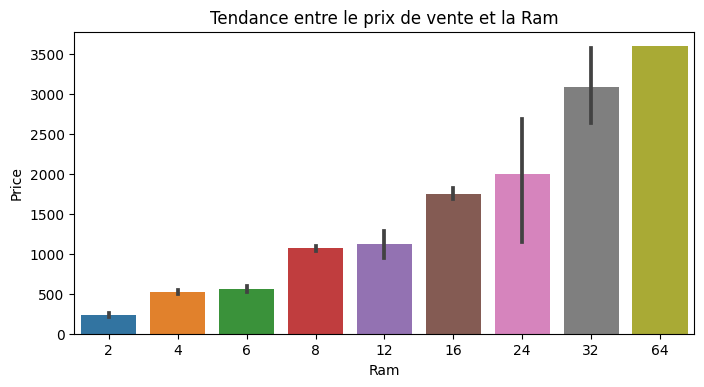

In [190]:
plt.figure(figsize=(8, 4), dpi=100)
plt.title("Tendance entre le prix de vente et la Ram")
sns.barplot(x=df_price["Ram"], y=df_price["Price"]);

*La figure ci-dessus nous montre que plus la Ram est grande, plus le prix de vente à tendance à augmenter. Donc la relation entre ces 2 colonnes est forte et positive.*

**Feature Engineering sur la colonne OpSys**

Dans cette partie, je vais regrouper les systèmes dans des catégories du plus représenté au moins représenté.

In [191]:
df_price["OpSys"].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

In [192]:
df_price['OpSys'].unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android',
       'Windows 10 S', 'Chrome OS', 'Windows 7'], dtype=object)

In [193]:
# Je vais regrouper tout ce qui est lié à Windows dans un nom (Windows), les macOS dans un nom (MacOS) et le reste dans un nom (autres)
def get_op_sys(opsys):
  if opsys == "Windows 10" or opsys == "Windows 10 S" or opsys == "Windows 7":
    return "Windows"
  elif opsys == "macOS" or opsys == "Mac OS X":
    return "Mac OS"

  else:
    return "Other OS"


df_price["OpSys"] = df_price["OpSys"].apply(lambda x: get_op_sys(x))
df_price

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu_name
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,Mac OS,1.37,1213.44,0,1,2597.321929,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,Mac OS,1.34,814.22,0,0,1460.993585,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,Other OS,1.86,520.81,0,0,1939.373412,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,Mac OS,1.83,2298.32,0,1,2916.297243,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,Mac OS,1.37,1633.63,0,1,2597.321929,Intel Core i5
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,128GB SSD,Intel HD Graphics 520,Windows,1.80,577.87,1,1,1941.575207,Intel Core i7
1299,Lenovo,2 in 1 Convertible,16,512GB SSD,Intel HD Graphics 520,Windows,1.30,1357.73,1,1,3237.840179,Intel Core i7
1300,Lenovo,Notebook,2,64GB Flash Storage,Intel HD Graphics,Windows,1.50,207.42,0,0,1381.334965,Other Intel Processor
1301,HP,Notebook,6,1TB HDD,AMD Radeon R5 M330,Windows,2.19,692.00,0,0,1379.769992,Intel Core i7


**Visualisation de la colonne OpSys**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


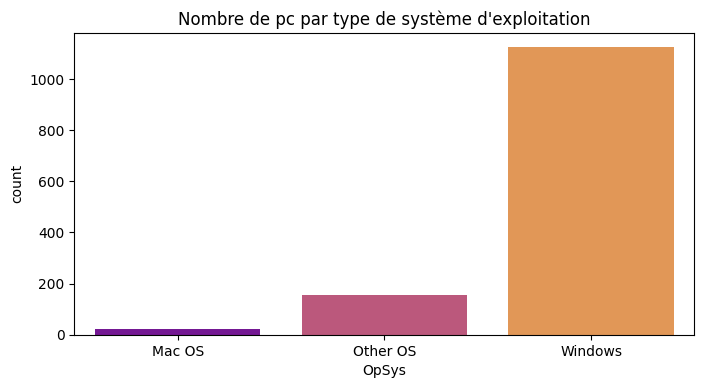

In [194]:
plt.figure(figsize=(8, 4), dpi=100)
plt.title("Nombre de pc par type de système d'exploitation")
sns.countplot(df_price["OpSys"], palette="plasma");

*Pour ce jeu de données, Windows est le système d'exploitation le plus utilisé.*

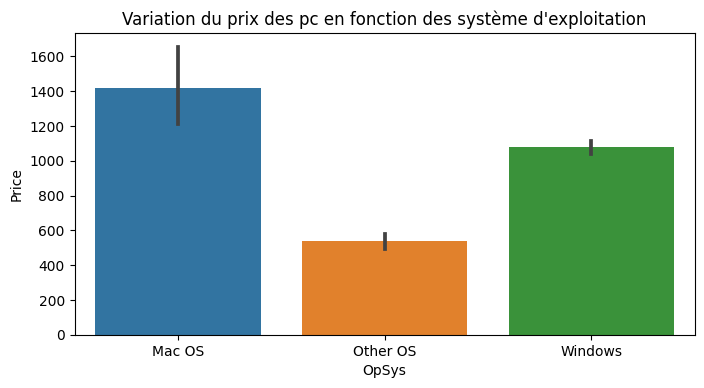

In [195]:
# Variation avec le prix
plt.figure(figsize=(8, 4), dpi=100)
plt.title("Variation du prix des pc en fonction des système d'exploitation")
sns.barplot(x=df_price["OpSys"], y=df_price["Price"]);

*Nous avons vu que les pc mac sont les moins représentés, mais ce sont également des pc qui coûtent le plus chères en moyenne par rapport aux autres. Ensuite vient les pc ayant le système windows.*

In [196]:
df_price

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu_name
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,Mac OS,1.37,1213.44,0,1,2597.321929,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,Mac OS,1.34,814.22,0,0,1460.993585,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,Other OS,1.86,520.81,0,0,1939.373412,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,Mac OS,1.83,2298.32,0,1,2916.297243,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,Mac OS,1.37,1633.63,0,1,2597.321929,Intel Core i5
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,128GB SSD,Intel HD Graphics 520,Windows,1.80,577.87,1,1,1941.575207,Intel Core i7
1299,Lenovo,2 in 1 Convertible,16,512GB SSD,Intel HD Graphics 520,Windows,1.30,1357.73,1,1,3237.840179,Intel Core i7
1300,Lenovo,Notebook,2,64GB Flash Storage,Intel HD Graphics,Windows,1.50,207.42,0,0,1381.334965,Other Intel Processor
1301,HP,Notebook,6,1TB HDD,AMD Radeon R5 M330,Windows,2.19,692.00,0,0,1379.769992,Intel Core i7


**Feature Engineering sur la colonne Gpu**

*Pour cette colonne, je vais juste récupérer le nom du modèle du Gpu intégré dans le pc.*

In [197]:
df_price["Gpu"].str.split()[0][0]

'Intel'

In [198]:
# Création de la fonction pour récupérer les modèles des différents Gpu
def get_gpu_brand(gpu):
  return gpu.split()[0]


# Je vais appliquer la fonction à toutes les valeurs de la colonne Gpu et les stocker dans Gpu_brand
df_price["Gpu_brand"] = df_price["Gpu"].apply(lambda x: get_gpu_brand(x))
df_price

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu_name,Gpu_brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,Mac OS,1.37,1213.44,0,1,2597.321929,Intel Core i5,Intel
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,Mac OS,1.34,814.22,0,0,1460.993585,Intel Core i5,Intel
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,Other OS,1.86,520.81,0,0,1939.373412,Intel Core i5,Intel
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,Mac OS,1.83,2298.32,0,1,2916.297243,Intel Core i7,AMD
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,Mac OS,1.37,1633.63,0,1,2597.321929,Intel Core i5,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,128GB SSD,Intel HD Graphics 520,Windows,1.80,577.87,1,1,1941.575207,Intel Core i7,Intel
1299,Lenovo,2 in 1 Convertible,16,512GB SSD,Intel HD Graphics 520,Windows,1.30,1357.73,1,1,3237.840179,Intel Core i7,Intel
1300,Lenovo,Notebook,2,64GB Flash Storage,Intel HD Graphics,Windows,1.50,207.42,0,0,1381.334965,Other Intel Processor,Intel
1301,HP,Notebook,6,1TB HDD,AMD Radeon R5 M330,Windows,2.19,692.00,0,0,1379.769992,Intel Core i7,AMD


In [199]:
# Je vais supprimer maintenant la colonne Gpu parce que j'ai généré la colonne Gpu brand
df_price.drop("Gpu", axis=1, inplace=True)

In [200]:
df_price

,Company,TypeName,Ram,Memory,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu_name,Gpu_brand
0,Apple,Ultrabook,8,128GB SSD,Mac OS,1.37,1213.44,0,1,2597.321929,Intel Core i5,Intel
1,Apple,Ultrabook,8,128GB Flash Storage,Mac OS,1.34,814.22,0,0,1460.993585,Intel Core i5,Intel
2,HP,Notebook,8,256GB SSD,Other OS,1.86,520.81,0,0,1939.373412,Intel Core i5,Intel
3,Apple,Ultrabook,16,512GB SSD,Mac OS,1.83,2298.32,0,1,2916.297243,Intel Core i7,AMD
4,Apple,Ultrabook,8,256GB SSD,Mac OS,1.37,1633.63,0,1,2597.321929,Intel Core i5,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,128GB SSD,Windows,1.80,577.87,1,1,1941.575207,Intel Core i7,Intel
1299,Lenovo,2 in 1 Convertible,16,512GB SSD,Windows,1.30,1357.73,1,1,3237.840179,Intel Core i7,Intel
1300,Lenovo,Notebook,2,64GB Flash Storage,Windows,1.50,207.42,0,0,1381.334965,Other Intel Processor,Intel
1301,HP,Notebook,6,1TB HDD,Windows,2.19,692.00,0,0,1379.769992,Intel Core i7,AMD


**Visualisation de la colonne Gpu_brand**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


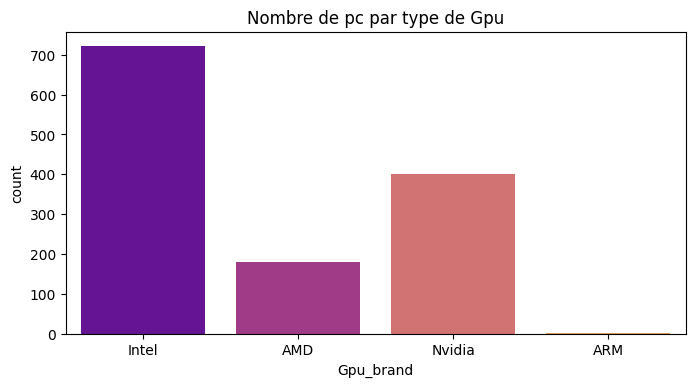

In [201]:
plt.figure(figsize=(8, 4), dpi=100)
plt.title("Nombre de pc par type de Gpu")
sns.countplot(df_price["Gpu_brand"], palette="plasma");

*Les Gpu Intel sont les plus représentées, puis Nvidia et AMD. Comme ARM est moins représenté, je vais l'exclure de la visualisation à la figure suivante.*

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


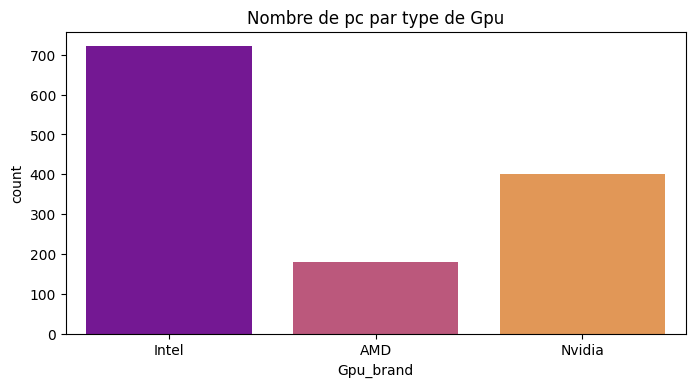

In [202]:
high_count_gpu = df_price[df_price["Gpu_brand"] != "ARM"]
plt.figure(figsize=(8, 4), dpi=100)
plt.title("Nombre de pc par type de Gpu")
sns.countplot(high_count_gpu["Gpu_brand"], palette="plasma");

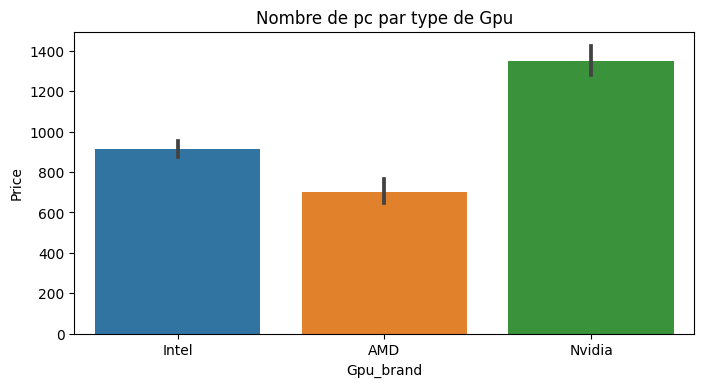

In [203]:
# Variation avec le prix
plt.figure(figsize=(8, 4), dpi=100)
plt.title("Nombre de pc par type de Gpu")
sns.barplot(x=high_count_gpu["Gpu_brand"], y=high_count_gpu["Price"]);

In [204]:
df_price = high_count_gpu

In [205]:
df_price.groupby("Gpu_brand")["Price"].mean().sort_values(ascending=False)

Gpu_brand
Nvidia    1349.468525
Intel      913.210194
AMD        702.550889
Name: Price, dtype: float64

*En moyenne, les pc ayant les Gpu de type Nvidia coûtent les plus chères.*

**Feature Engineering sur la colonne Memory**

In [206]:
df_price["Memory"].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                37
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

*Nous voyons qu'il y a 4 types populaires de mémoires : SSD, HDD, Flash Storage et Hybrid.*

In [207]:
# Suppression du .0 qui se présentent sur certains disques 1TB. Ex: 1.0TB
df_price["Memory"] = df_price["Memory"].str.replace("\.0", "", regex=True)

# Suppression des GB
df_price["Memory"] = df_price["Memory"].str.replace("GB", "")

# Suppression des TB et ajout de 000
df_price["Memory"].str.replace("TB", "000")

# Diviser les disques durs composés
new_df = df_price["Memory"].str.split("+", expand=True)
new_df

<ipython-input-207-db5a6ac19d86>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_price["Memory"] = df_price["Memory"].str.replace("\.0", "", regex=True)
<ipython-input-207-db5a6ac19d86>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_price["Memory"] = df_price["Memory"].str.replace("GB", "")


,0,1
0,128 SSD,None
1,128 Flash Storage,None
2,256 SSD,None
3,512 SSD,None
4,256 SSD,None
...,...,...
1298,128 SSD,None
1299,512 SSD,None
1300,64 Flash Storage,None
1301,1TB HDD,None


In [208]:
# Première partie du nouveau dataframe
df_price["First"] = new_df[0].str.strip()
df_price

<ipython-input-208-0b02d74cc834>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_price["First"] = new_df[0].str.strip()


,Company,TypeName,Ram,Memory,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu_name,Gpu_brand,First
0,Apple,Ultrabook,8,128 SSD,Mac OS,1.37,1213.44,0,1,2597.321929,Intel Core i5,Intel,128 SSD
1,Apple,Ultrabook,8,128 Flash Storage,Mac OS,1.34,814.22,0,0,1460.993585,Intel Core i5,Intel,128 Flash Storage
2,HP,Notebook,8,256 SSD,Other OS,1.86,520.81,0,0,1939.373412,Intel Core i5,Intel,256 SSD
3,Apple,Ultrabook,16,512 SSD,Mac OS,1.83,2298.32,0,1,2916.297243,Intel Core i7,AMD,512 SSD
4,Apple,Ultrabook,8,256 SSD,Mac OS,1.37,1633.63,0,1,2597.321929,Intel Core i5,Intel,256 SSD
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,128 SSD,Windows,1.80,577.87,1,1,1941.575207,Intel Core i7,Intel,128 SSD
1299,Lenovo,2 in 1 Convertible,16,512 SSD,Windows,1.30,1357.73,1,1,3237.840179,Intel Core i7,Intel,512 SSD
1300,Lenovo,Notebook,2,64 Flash Storage,Windows,1.50,207.42,0,0,1381.334965,Other Intel Processor,Intel,64 Flash Storage
1301,HP,Notebook,6,1TB HDD,Windows,2.19,692.00,0,0,1379.769992,Intel Core i7,AMD,1TB HDD


In [209]:
# Je vais générer des nouvelles colonnes (couches de disques) à partir de la colonne First
def apply_gen_cols(value):
  df_price["Layer1_"+value] = df_price["First"].apply(lambda x:1 if value in x else 0)

list_disq = ["SSD", "HDD", "Flash Storage", "Hybrid"]
for val in list_disq:
  apply_gen_cols(val)

df_price

<ipython-input-209-4ee3ec87561f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_price["Layer1_"+value] = df_price["First"].apply(lambda x:1 if value in x else 0)


,Company,TypeName,Ram,Memory,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu_name,Gpu_brand,First,Layer1_SSD,Layer1_HDD,Layer1_Flash Storage,Layer1_Hybrid
0,Apple,Ultrabook,8,128 SSD,Mac OS,1.37,1213.44,0,1,2597.321929,Intel Core i5,Intel,128 SSD,1,0,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Mac OS,1.34,814.22,0,0,1460.993585,Intel Core i5,Intel,128 Flash Storage,0,0,1,0
2,HP,Notebook,8,256 SSD,Other OS,1.86,520.81,0,0,1939.373412,Intel Core i5,Intel,256 SSD,1,0,0,0
3,Apple,Ultrabook,16,512 SSD,Mac OS,1.83,2298.32,0,1,2916.297243,Intel Core i7,AMD,512 SSD,1,0,0,0
4,Apple,Ultrabook,8,256 SSD,Mac OS,1.37,1633.63,0,1,2597.321929,Intel Core i5,Intel,256 SSD,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,128 SSD,Windows,1.80,577.87,1,1,1941.575207,Intel Core i7,Intel,128 SSD,1,0,0,0
1299,Lenovo,2 in 1 Convertible,16,512 SSD,Windows,1.30,1357.73,1,1,3237.840179,Intel Core i7,Intel,512 SSD,1,0,0,0
1300,Lenovo,Notebook,2,64 Flash Storage,Windows,1.50,207.42,0,0,1381.334965,Other Intel Processor,Intel,64 Flash Storage,0,0,1,0
1301,HP,Notebook,6,1TB HDD,Windows,2.19,692.00,0,0,1379.769992,Intel Core i7,AMD,1TB HDD,0,1,0,0


In [210]:
# Suppression des chaînes de caractères qui viennent après les nombres dans la colonne First
df_price["First"] = df_price["First"].str.replace(r"\D", "", regex=True)
df_price["First"].value_counts()

<ipython-input-210-a48fd89d3292>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_price["First"] = df_price["First"].str.replace(r"\D", "", regex=True)


256    508
1      250
128    177
512    140
500    132
32      44
64      17
2       16
16      10
180      5
240      1
8        1
508      1
Name: First, dtype: int64

In [211]:
# Seconde partie du nouveau dataframe
# Remplacement des valeurs nulles par la chaîne de caractère "0"
df_price["Second"] = new_df[1].fillna("0")
df_price

<ipython-input-211-833c38b6bb32>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_price["Second"] = new_df[1].fillna("0")


,Company,TypeName,Ram,Memory,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu_name,Gpu_brand,First,Layer1_SSD,Layer1_HDD,Layer1_Flash Storage,Layer1_Hybrid,Second
0,Apple,Ultrabook,8,128 SSD,Mac OS,1.37,1213.44,0,1,2597.321929,Intel Core i5,Intel,128,1,0,0,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Mac OS,1.34,814.22,0,0,1460.993585,Intel Core i5,Intel,128,0,0,1,0,0
2,HP,Notebook,8,256 SSD,Other OS,1.86,520.81,0,0,1939.373412,Intel Core i5,Intel,256,1,0,0,0,0
3,Apple,Ultrabook,16,512 SSD,Mac OS,1.83,2298.32,0,1,2916.297243,Intel Core i7,AMD,512,1,0,0,0,0
4,Apple,Ultrabook,8,256 SSD,Mac OS,1.37,1633.63,0,1,2597.321929,Intel Core i5,Intel,256,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,128 SSD,Windows,1.80,577.87,1,1,1941.575207,Intel Core i7,Intel,128,1,0,0,0,0
1299,Lenovo,2 in 1 Convertible,16,512 SSD,Windows,1.30,1357.73,1,1,3237.840179,Intel Core i7,Intel,512,1,0,0,0,0
1300,Lenovo,Notebook,2,64 Flash Storage,Windows,1.50,207.42,0,0,1381.334965,Other Intel Processor,Intel,64,0,0,1,0,0
1301,HP,Notebook,6,1TB HDD,Windows,2.19,692.00,0,0,1379.769992,Intel Core i7,AMD,1,0,1,0,0,0


In [212]:
# Je vais générer également des nouvelles colonnes (couches) pour la seconde partie des disques composés
def apply_gen_cols2(value):
  df_price["Layer2_"+value] = df_price["Second"].apply(lambda x: 1 if value in x else 0)

list_disq2 = ["SSD", "HDD", "Flash Storage", "Hybrid"]
for val2 in list_disq2:
  apply_gen_cols2(val2)

df_price

<ipython-input-212-730d166435e6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_price["Layer2_"+value] = df_price["Second"].apply(lambda x: 1 if value in x else 0)


,Company,TypeName,Ram,Memory,OpSys,Weight,Price,Touchscreen,IPS,PPI,...,First,Layer1_SSD,Layer1_HDD,Layer1_Flash Storage,Layer1_Hybrid,Second,Layer2_SSD,Layer2_HDD,Layer2_Flash Storage,Layer2_Hybrid
0,Apple,Ultrabook,8,128 SSD,Mac OS,1.37,1213.44,0,1,2597.321929,...,128,1,0,0,0,0,0,0,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Mac OS,1.34,814.22,0,0,1460.993585,...,128,0,0,1,0,0,0,0,0,0
2,HP,Notebook,8,256 SSD,Other OS,1.86,520.81,0,0,1939.373412,...,256,1,0,0,0,0,0,0,0,0
3,Apple,Ultrabook,16,512 SSD,Mac OS,1.83,2298.32,0,1,2916.297243,...,512,1,0,0,0,0,0,0,0,0
4,Apple,Ultrabook,8,256 SSD,Mac OS,1.37,1633.63,0,1,2597.321929,...,256,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,128 SSD,Windows,1.80,577.87,1,1,1941.575207,...,128,1,0,0,0,0,0,0,0,0
1299,Lenovo,2 in 1 Convertible,16,512 SSD,Windows,1.30,1357.73,1,1,3237.840179,...,512,1,0,0,0,0,0,0,0,0
1300,Lenovo,Notebook,2,64 Flash Storage,Windows,1.50,207.42,0,0,1381.334965,...,64,0,0,1,0,0,0,0,0,0
1301,HP,Notebook,6,1TB HDD,Windows,2.19,692.00,0,0,1379.769992,...,1,0,1,0,0,0,0,0,0,0


In [213]:
# Suppression de toutes les chaînes qui viennent après les nombres 
df_price["Second"] = df_price["Second"].str.replace(r"\D", "", regex=True)

<ipython-input-213-969d418644e4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_price["Second"] = df_price["Second"].str.replace(r"\D", "", regex=True)


In [214]:
# Conversion des colonnes First et Second en entier
df_price["First"] = df_price["First"].astype("int64")
df_price["Second"] = df_price["Second"].astype("int64")

df_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1302 entries, 0 to 1302
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1302 non-null   object 
 1   TypeName              1302 non-null   object 
 2   Ram                   1302 non-null   int64  
 3   Memory                1302 non-null   object 
 4   OpSys                 1302 non-null   object 
 5   Weight                1302 non-null   float64
 6   Price                 1302 non-null   float64
 7   Touchscreen           1302 non-null   int64  
 8   IPS                   1302 non-null   int64  
 9   PPI                   1302 non-null   float64
 10  Cpu_name              1302 non-null   object 
 11  Gpu_brand             1302 non-null   object 
 12  First                 1302 non-null   int64  
 13  Layer1_SSD            1302 non-null   int64  
 14  Layer1_HDD            1302 non-null   int64  
 15  Layer1_Flash Storage 

<ipython-input-214-2a662645c34d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_price["First"] = df_price["First"].astype("int64")
<ipython-input-214-2a662645c34d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_price["Second"] = df_price["Second"].astype("int64")


In [215]:
# Maintenant que j'ai assez d'informations pour les disques durs, je vais créer
# des colonnes correspondantes pour chaque information.
df_price["SSD"] = (df_price["First"]*df_price["Layer1_SSD"]) + (df_price["Second"]*df_price["Layer2_SSD"])
df_price["HDD"] = (df_price["First"]*df_price["Layer1_HDD"]) + (df_price["Second"]*df_price["Layer2_HDD"])
df_price["Flash Storage"] = (df_price["First"]*df_price["Layer1_Flash Storage"]) + (df_price["Second"]*df_price["Layer2_Flash Storage"])
df_price["Hybrid"] = (df_price["First"]*df_price["Layer1_Hybrid"]) + (df_price["Second"]*df_price["Layer2_Hybrid"])

df_price

<ipython-input-215-f1d2d86e478f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_price["SSD"] = (df_price["First"]*df_price["Layer1_SSD"]) + (df_price["Second"]*df_price["Layer2_SSD"])
<ipython-input-215-f1d2d86e478f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_price["HDD"] = (df_price["First"]*df_price["Layer1_HDD"]) + (df_price["Second"]*df_price["Layer2_HDD"])
<ipython-input-215-f1d2d86e478f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

,Company,TypeName,Ram,Memory,OpSys,Weight,Price,Touchscreen,IPS,PPI,...,Layer1_Hybrid,Second,Layer2_SSD,Layer2_HDD,Layer2_Flash Storage,Layer2_Hybrid,SSD,HDD,Flash Storage,Hybrid
0,Apple,Ultrabook,8,128 SSD,Mac OS,1.37,1213.44,0,1,2597.321929,...,0,0,0,0,0,0,128,0,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Mac OS,1.34,814.22,0,0,1460.993585,...,0,0,0,0,0,0,0,0,128,0
2,HP,Notebook,8,256 SSD,Other OS,1.86,520.81,0,0,1939.373412,...,0,0,0,0,0,0,256,0,0,0
3,Apple,Ultrabook,16,512 SSD,Mac OS,1.83,2298.32,0,1,2916.297243,...,0,0,0,0,0,0,512,0,0,0
4,Apple,Ultrabook,8,256 SSD,Mac OS,1.37,1633.63,0,1,2597.321929,...,0,0,0,0,0,0,256,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,128 SSD,Windows,1.80,577.87,1,1,1941.575207,...,0,0,0,0,0,0,128,0,0,0
1299,Lenovo,2 in 1 Convertible,16,512 SSD,Windows,1.30,1357.73,1,1,3237.840179,...,0,0,0,0,0,0,512,0,0,0
1300,Lenovo,Notebook,2,64 Flash Storage,Windows,1.50,207.42,0,0,1381.334965,...,0,0,0,0,0,0,0,0,64,0
1301,HP,Notebook,6,1TB HDD,Windows,2.19,692.00,0,0,1379.769992,...,0,0,0,0,0,0,0,1,0,0


In [216]:
# Je vais supprimer toutes les colonnes générées (First, Second et les différents Layer)
df_price.drop(["First", "Second", "Layer1_SSD", "Layer1_HDD", "Layer1_Flash Storage", "Layer1_Hybrid",
               "Layer2_SSD", "Layer2_HDD", "Layer2_Flash Storage", "Layer2_Hybrid"], axis=1, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [217]:
df_price

,Company,TypeName,Ram,Memory,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu_name,Gpu_brand,SSD,HDD,Flash Storage,Hybrid
0,Apple,Ultrabook,8,128 SSD,Mac OS,1.37,1213.44,0,1,2597.321929,Intel Core i5,Intel,128,0,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Mac OS,1.34,814.22,0,0,1460.993585,Intel Core i5,Intel,0,0,128,0
2,HP,Notebook,8,256 SSD,Other OS,1.86,520.81,0,0,1939.373412,Intel Core i5,Intel,256,0,0,0
3,Apple,Ultrabook,16,512 SSD,Mac OS,1.83,2298.32,0,1,2916.297243,Intel Core i7,AMD,512,0,0,0
4,Apple,Ultrabook,8,256 SSD,Mac OS,1.37,1633.63,0,1,2597.321929,Intel Core i5,Intel,256,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,128 SSD,Windows,1.80,577.87,1,1,1941.575207,Intel Core i7,Intel,128,0,0,0
1299,Lenovo,2 in 1 Convertible,16,512 SSD,Windows,1.30,1357.73,1,1,3237.840179,Intel Core i7,Intel,512,0,0,0
1300,Lenovo,Notebook,2,64 Flash Storage,Windows,1.50,207.42,0,0,1381.334965,Other Intel Processor,Intel,0,0,64,0
1301,HP,Notebook,6,1TB HDD,Windows,2.19,692.00,0,0,1379.769992,Intel Core i7,AMD,0,1,0,0


In [218]:
# Je vais supprimer également la colonne Memory
df_price.drop("Memory", axis=1, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [219]:
df_price

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu_name,Gpu_brand,SSD,HDD,Flash Storage,Hybrid
0,Apple,Ultrabook,8,Mac OS,1.37,1213.44,0,1,2597.321929,Intel Core i5,Intel,128,0,0,0
1,Apple,Ultrabook,8,Mac OS,1.34,814.22,0,0,1460.993585,Intel Core i5,Intel,0,0,128,0
2,HP,Notebook,8,Other OS,1.86,520.81,0,0,1939.373412,Intel Core i5,Intel,256,0,0,0
3,Apple,Ultrabook,16,Mac OS,1.83,2298.32,0,1,2916.297243,Intel Core i7,AMD,512,0,0,0
4,Apple,Ultrabook,8,Mac OS,1.37,1633.63,0,1,2597.321929,Intel Core i5,Intel,256,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,Windows,1.80,577.87,1,1,1941.575207,Intel Core i7,Intel,128,0,0,0
1299,Lenovo,2 in 1 Convertible,16,Windows,1.30,1357.73,1,1,3237.840179,Intel Core i7,Intel,512,0,0,0
1300,Lenovo,Notebook,2,Windows,1.50,207.42,0,0,1381.334965,Other Intel Processor,Intel,0,0,64,0
1301,HP,Notebook,6,Windows,2.19,692.00,0,0,1379.769992,Intel Core i7,AMD,0,1,0,0


**Analyse du prix**

In [220]:
# Corrélation
df_price.corr()['Price']

Ram              0.742905
Weight           0.209867
Price            1.000000
Touchscreen      0.192917
IPS              0.253320
PPI              0.556836
SSD              0.547147
HDD             -0.235126
Flash Storage   -0.040067
Hybrid          -0.004784
Name: Price, dtype: float64

*Avec cette corrélation, nous pouvons voir que les nouvelles colonnes générées (SSD et HDD) peuvent avoir de l'influence sur le prix d'une manière positive (SSD) ou négative (HDD). Par contre, Flash Storage et Hybrid ne peuvent pas du tout avoir une influence sur le prix, donc je vais les supprimer.*

In [221]:
df_price.drop(["Flash Storage", "Hybrid"], axis=1, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


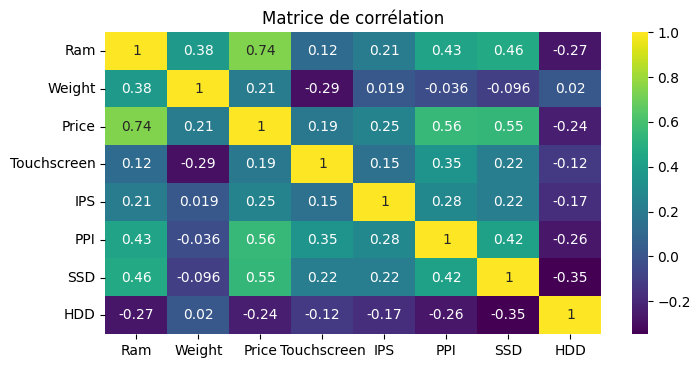

In [222]:
plt.figure(figsize=(8, 4), dpi=100)
plt.title("Matrice de corrélation")
sns.heatmap(df_price.corr(), annot=True, cmap="viridis");

**Visualisation du prix**

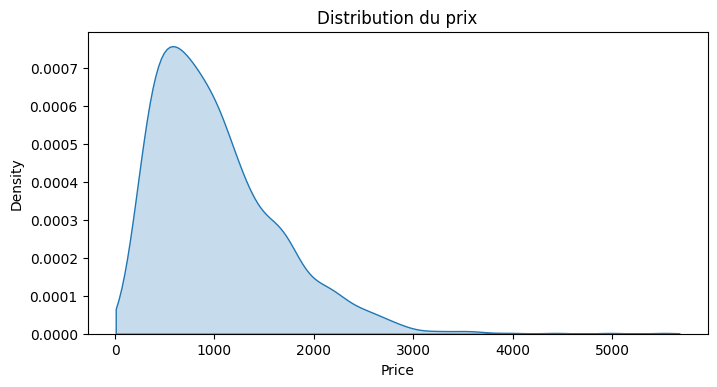

In [223]:
plt.figure(figsize=(8, 4), dpi=100)
plt.title("Distribution du prix")
sns.kdeplot(df_price["Price"], shade=True, cut=1);

*La distribution du prix est asymétrique à droite, car la queue de la distribution est plus longue au côté droit. Je vais appliquer le log pour me rapprocher d'une distribution normale centrée afin d'avoir des prédictions plus précises.*

In [224]:
np.log(df_price["Price"].loc[0])

7.101214580186547

In [225]:
np.exp(7.101214580186547)

1213.4399999999998

In [226]:
df_price["Price"].loc[0]

1213.44

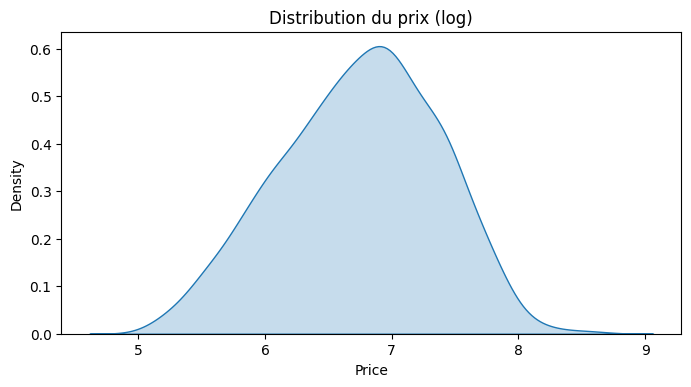

In [227]:
plt.figure(figsize=(8, 4), dpi=100)
plt.title("Distribution du prix (log)")
sns.kdeplot(np.log(df_price["Price"]), shade=True);

*Et là j'ai une distribution plutôt normale.*

### Machine Learning

**Note : comme il s'agit de prédire la valeur d'une variable numérique, il s'agit donc d'une tâche de regréssion.** 

**Importation des bibliothèques nécessaires**

In [228]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import r2_score, mean_absolute_error

In [229]:
# Séparation des données en entraînement (85%) et test (15%)
X = df_price.drop("Price", axis=1)
y = np.log(df_price["Price"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [230]:
# Récupération des colonnes sous forme d'un dictionnaire afin de pouvoir sélectionner les 
# colonnes catégorielles avec leurs index
mapper = {i:value for i, value in enumerate(X_train.columns)}
mapper

{0: 'Company',
 1: 'TypeName',
 2: 'Ram',
 3: 'OpSys',
 4: 'Weight',
 5: 'Touchscreen',
 6: 'IPS',
 7: 'PPI',
 8: 'Cpu_name',
 9: 'Gpu_brand',
 10: 'SSD',
 11: 'HDD'}

**Regréssion Linéaire**

In [231]:
# Encodage des données catégorielles
# Comme les données catégorielles ne sont pas ordinales, je vais utilisier le 
# OneHotEncoding
step1 = ColumnTransformer(transformers=[("col_trf", OneHotEncoder(sparse=False, drop="first"), [0,1,3,8,9])], remainder="passthrough")

# Model de regréssion linéaire
step2 = LinearRegression()

# Pipeline
pipe = Pipeline([("step1", step1), ("step2", step2)])

# Entraînement du modèle
pipe.fit(X_train, y_train)

# Prédiction et évaluation
y_pred = pipe.predict(X_test)

print("R Score : ", r2_score(y_test, y_pred))
print("Erreur absolue moyenne : ", mean_absolute_error(y_test, y_pred))

R Score :  0.784510746062277
Erreur absolue moyenne :  0.22741721961251368


In [232]:
np.exp(0.22741721961251368)

1.2553535168022436

*Nous pouvons voir qu'il y a une différence de 1.26 entre la vraie valeur du prix et celui prédit. Je vais utiliser un autre modèle de regréssion pour voir si je pourrai l'améliorer.*

**Regréssion Lasso**

In [233]:
# Pour le step1, je vais utiliser celui du modèle précédent (encodage des données catégorielles)
# Model de regréssion Lasso
step2 = Lasso(alpha=0.0001)

# Pipeline
pipe = Pipeline([("step1", step1), ("step2", step2)])

# Entraînement du modèle
pipe.fit(X_train, y_train)

# Prédiction et évaluation
y_pred = pipe.predict(X_test)

print("R Score : ", r2_score(y_test, y_pred))
print("Erreur absolue moyenne : ", mean_absolute_error(y_test, y_pred))

R Score :  0.7849200444997209
Erreur absolue moyenne :  0.22728388786746084


*La regréssion Lasso n'améliore pas le score de prédiction*

**Regréssion Ridge**

In [234]:
# Pour le step1, je vais utiliser celui du 1er modèle (encodage des données catégorielles)
# Model de regréssion Ridge
step2 = Ridge(alpha=1.0)

# Pipeline
pipe = Pipeline([("step1", step1), ("step2", step2)])

# Entraînement du modèle
pipe.fit(X_train, y_train)

# Prédiction et évaluation
y_pred = pipe.predict(X_test)

print("R Score : ", r2_score(y_test, y_pred))
print("Erreur absolue moyenne : ", mean_absolute_error(y_test, y_pred))

R Score :  0.7865587327445832
Erreur absolue moyenne :  0.22737044015137564


**L'abre de décision (Decision Tree)**

In [235]:
# Pour le step1, je vais utiliser celui du 1er modèle (encodage des données catégorielles)
# Model de regréssion par arbre de décision (Decision Tree)
step2 = DecisionTreeRegressor(max_depth=8)

# Pipeline
pipe = Pipeline([("step1", step1), ("step2", step2)])

# Entraînement du modèle
pipe.fit(X_train, y_train)

# Prédiction et évaluation
y_pred = pipe.predict(X_test)

print("R Score : ", r2_score(y_test, y_pred))
print("Erreur absolue moyenne : ", mean_absolute_error(y_test, y_pred))

R Score :  0.7532432104085274
Erreur absolue moyenne :  0.22855949340661288


**Forêts aléatoires (Random Forest)**

In [236]:
# Pour le step1, je vais utiliser celui du 1er modèle (encodage des données catégorielles)
# Model de regréssion Forêts aléatoires (Random Forest)
step2 = RandomForestRegressor(random_state=3,max_samples=0.5, max_features=0.5, max_depth=10)

# Pipeline
pipe = Pipeline([("step1", step1), ("step2", step2)])

# Entraînement du modèle
pipe.fit(X_train, y_train)

# Prédiction et évaluation
y_pred = pipe.predict(X_test)

print("R Score : ", r2_score(y_test, y_pred))
print("Erreur absolue moyenne : ", mean_absolute_error(y_test, y_pred))

R Score :  0.8516054143183704
Erreur absolue moyenne :  0.18419466292223985


*Nous voyons qu'avec l'utilisation de RandomForestRegressor, il a amélioré la précision du modèle. Donc, je vais maitenir ce dernier modèle pour mes futures prédictions.*

**Sauvegarde du modèle**

In [237]:
import pickle as pk

# pk.dump(df_price, open("df_price.pkl", "wb"))
# pk.dump(pipe, open("pipe.pkl", "wb"))

In [238]:
train_data = X
train_data

,Company,TypeName,Ram,OpSys,Weight,Touchscreen,IPS,PPI,Cpu_name,Gpu_brand,SSD,HDD
0,Apple,Ultrabook,8,Mac OS,1.37,0,1,2597.321929,Intel Core i5,Intel,128,0
1,Apple,Ultrabook,8,Mac OS,1.34,0,0,1460.993585,Intel Core i5,Intel,0,0
2,HP,Notebook,8,Other OS,1.86,0,0,1939.373412,Intel Core i5,Intel,256,0
3,Apple,Ultrabook,16,Mac OS,1.83,0,1,2916.297243,Intel Core i7,AMD,512,0
4,Apple,Ultrabook,8,Mac OS,1.37,0,1,2597.321929,Intel Core i5,Intel,256,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,Windows,1.80,1,1,1941.575207,Intel Core i7,Intel,128,0
1299,Lenovo,2 in 1 Convertible,16,Windows,1.30,1,1,3237.840179,Intel Core i7,Intel,512,0
1300,Lenovo,Notebook,2,Windows,1.50,0,0,1381.334965,Other Intel Processor,Intel,0,0
1301,HP,Notebook,6,Windows,2.19,0,0,1379.769992,Intel Core i7,AMD,0,1


In [239]:
train_data.to_csv("trained_data.csv", index=False)

### Comment les hyperparamètres de la forêt aléatoire ont été choisis pour fournir le meilleur modèle ?

In [240]:
indexList = [0,1,3,8,9]
transformList = []
for key,value in mapper.items():
  if key in indexList:
    transformList.append(value)
  else:
    pass

transformList

['Company', 'TypeName', 'OpSys', 'Cpu_name', 'Gpu_brand']

*Encodage des variables catégorielles*

In [241]:
train = pd.get_dummies(train_data, columns=transformList, drop_first=True)
train.head()

,Ram,Weight,Touchscreen,IPS,PPI,SSD,HDD,Company_Apple,Company_Asus,Company_Chuwi,...,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation,OpSys_Other OS,OpSys_Windows,Cpu_name_Intel Core i5,Cpu_name_Intel Core i7,Cpu_name_Other Intel Processor,Gpu_brand_Intel,Gpu_brand_Nvidia
0,8,1.37,0,1,2597.321929,128,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
1,8,1.34,0,0,1460.993585,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
2,8,1.86,0,0,1939.373412,256,0,0,0,0,...,1,0,0,1,0,1,0,0,1,0
3,16,1.83,0,1,2916.297243,512,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
4,8,1.37,0,1,2597.321929,256,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0


*Séparation des données en entraînement et test.*

In [242]:
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.15, random_state=101)

X_train.shape, X_test.shape

((1106, 37), (196, 37))

*Liste des paramètres*

**Note: Je vais mettre 2 modèles (RandomForest et Decision Tree) dans la liste des paramètres afin de rechercher le meilleur modèle.**

In [243]:
params = {
    
    "RandomForest":{
        "model": RandomForestRegressor(),
        "params":{
            "n_estimators":[int(x) for x in np.linspace(100, 1200, 10)],
            "criterion": ["mse", "mae"],
            "max_depth": [int(x) for x in np.linspace(1, 30, 5)],
            "max_features": ["auto", "sqrt", "log2"],
            "ccp_alpha": [x for x in np.linspace(0.0025, 0.0125, 5)],
            "min_samples_split": [2, 5, 10, 14],
            "min_samples_leaf": [2, 5, 10, 14],
        }
    }, 
    "Decision Tree":{
        "model": DecisionTreeRegressor(),
        "params":{
            "criterion": ["mse", "mae"],
            "max_depth": [int(x) for x in np.linspace(1, 30, 5)],
            "max_features": ["auto", "sqrt", "log2"],
            "ccp_alpha": [x for x in np.linspace(0.0025, 0.0125, 5)],
            "min_samples_split": [2, 5, 10, 14],
            "min_samples_leaf": [2, 5, 10, 14]
        }
    }
}

In [244]:
scores = []
for model_name, model_param in params.items():
  model_s = RandomizedSearchCV(model_param["model"], param_distributions=model_param['params'],
                               cv=5, n_iter=10, scoring="neg_mean_squared_error", verbose=0)
  model_s.fit(X_train, y_train)
  scores.append({
      "model_name": model_name,
      "best_score": model_s.best_score_,
      "best_estimator": model_s.best_estimator_
  })

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was d

In [245]:
# scores_df = pd.DataFrame(scores, columns=["model_name", "best_score", "best_estimator"])
# scores_df

In [246]:
scores

[{'model_name': 'RandomForest',
  'best_score': -0.08771758827172053,
  'best_estimator': RandomForestRegressor(ccp_alpha=0.005, criterion='mae', max_depth=15,
                        max_features='sqrt', min_samples_leaf=5,
                        min_samples_split=10, n_estimators=833)},
 {'model_name': 'Decision Tree',
  'best_score': -0.10751517195910107,
  'best_estimator': DecisionTreeRegressor(ccp_alpha=0.005, criterion='mae', max_depth=15,
                        max_features='auto', min_samples_leaf=10)}]

In [247]:
model_rf = RandomForestRegressor(ccp_alpha=0.0025, criterion='mae', max_depth=22,
                        max_features='log2', min_samples_leaf=2,
                        min_samples_split=5, n_estimators=711)

model_rf.fit(X_train, y_train)
y_pred = model_rf.predict(X_test)
print("R Score : ", r2_score(y_test, y_pred))

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


R Score :  0.7994291713288616


**Prédiction sur l'ensemble du dataset et sauvegarde du modèle final**

Comme je vais déployer le modèle (celui qui a un R2 Score de **85%**, je vais l'entraîner sur l'ensemble des données puis le sauvegarder.

In [248]:
price_pedicted_df = pipe.predict(train_data)
# Comme on avait normalisé le prix au début avec log, je vais lui ramener à la valeur d'origine avec exponentielle
price_org = np.exp(price_pedicted_df)

**Visualisation du prix actuel et celui prédit par l'algorithme RandomForest**

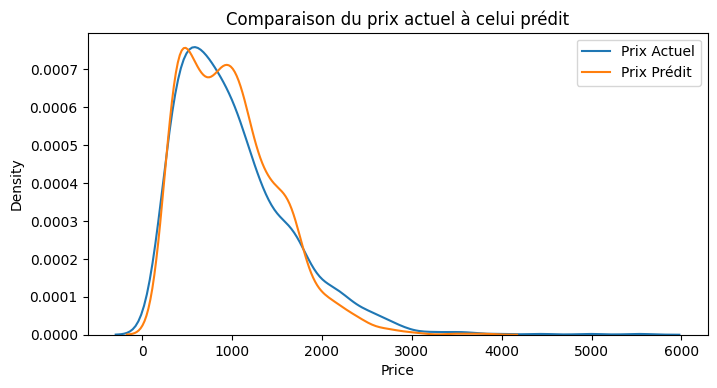

In [249]:
plt.figure(figsize=(8, 4), dpi=100)
plt.title("Comparaison du prix actuel à celui prédit")
sns.kdeplot(df_price["Price"], label="Prix Actuel")
sns.kdeplot(price_org, label="Prix Prédit")
plt.legend();

*Nous pouvons voir même s'il y a de la différence entre les valeurs prédites et celles présentes du prix, elles se rapprochent beaucoup aux valeurs réelles du prix de vente.*

In [250]:
# Sauvegarde du modèle
file = open("laptop_price_predictor.pkl", "wb")
pk.dump(pipe, file)
file.close()